In [14]:
# To search documents 

#Import Elascticsearch and helpers from  elasticsearch

from elasticsearch import Elasticsearch,helpers
import json

es = Elasticsearch(['http://localhost:9200'])
es.ping()   #connection testing
res = es.search(index="pdgithub_issues", body={"query": {"match_all": {}}})

# Extract the total hit count
print("Got %d Hits:" % res['hits']['total']['value'])

# Extract hits from the response
hits = res.get('hits', {})

# Pretty print the hits
print(json.dumps(hits, indent=2))


Got 3879 Hits:
{
  "total": {
    "value": 3879,
    "relation": "eq"
  },
  "max_score": 1.0,
  "hits": [
    {
      "_index": "pdgithub_issues",
      "_id": "LzyfUZMBhjFOvW2DRbFb",
      "_score": 1.0,
      "_source": {
        "_type": "issue",
        "_repo": "langchain",
        "_issueNumber": "28276",
        "_title": "langchain-chroma== 0.1.4   method get_by_ids is listed in documentation BUT I am getting NotImplementedError",
        "_createdAt": "2024-11-22T01:13:50Z",
        "_closedAt": "2024-12-31T00:36:30Z",
        "_state": "open",
        "_body": "### Checked other resources\n\n- [X] I added a very descriptive title to this issue.\n- [X] I searched the LangChain documentation with the integrated search.\n- [X] I used the GitHub search to find a similar question and didn't find it.\n- [X] I am sure that this is a bug in LangChain rather than my code.\n- [X] The bug is not resolved by updating to the latest stable version of LangChain (or the specific integration

In [ ]:
# Define model and embedding function
from openai import OpenAI
EMBEDDING_MODEL = "text-embedding-ada-002"
client = OpenAI(api_key="API_KEY")
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding


In [16]:
# Pretty print function for GitHub Issues

def pretty_response_Issue(response):
    for hit in response['hits']['hits']:
        type = hit['_source']['_type']
        repo =hit['_source']['_repo']
        issueNumber = hit['_source']['_issueNumber']
        title = hit['_source']['_title']
        createdAt = hit['_source']['_createdAt']
        closedAt = hit['_source']['_closedAt']
        state = hit['_source']['_state']
        body = hit['_source']['_body']
        
        pretty_output = (
            f"\nType: {type}\nRepo:{repo}\nIssue Number: {issueNumber}\nTitle: {title}\nCreated At: {createdAt}\nClosed At: {closedAt}\n"
            f"State: {state}\nBody: {body}\n"
        )
        print(pretty_output)

In [17]:
hits['hits'][5]['_source']  # Choose an Issue from Issues in repository

{'_type': 'issue',
 '_repo': 'langchain',
 '_issueNumber': '28271',
 '_title': "PydanticUndefinedAnnotation: name 'SafetySetting' is not defined using ChatVertexAI",
 '_createdAt': '2024-11-21T22:43:53Z',
 '_closedAt': '2024-12-31T00:36:30Z',
 '_state': 'open',
 '_body': '### Checked other resources\n\n- [X] I added a very descriptive title to this issue.\n- [X] I searched the LangChain documentation with the integrated search.\n- [X] I used the GitHub search to find a similar question and didn\'t find it.\n- [X] I am sure that this is a bug in LangChain rather than my code.\n- [X] The bug is not resolved by updating to the latest stable version of LangChain (or the specific integration package).\n\n### Example Code\n\n\r\n```python\r\n\r\n# Ensure your VertexAI credentials are configured\r\n\r\nfrom langchain_google_vertexai import ChatVertexAI\r\n\r\nmodel = ChatVertexAI(model="gemini-1.5-flash")\r\n\r\nmodel.invoke("Hello, world!")\r\n\r\n```\n\n### Error Message and Stack Trace (if

In [18]:
import requests
from datetime import datetime, timedelta

# GitHub repository information

repositories = [
    {"owner": "langchain-ai", "name": "langchain"},
    {"owner": "langchain-ai", "name": "langgraph"},
    {"owner": "microsoft", "name": "autogen"},
    {"owner": "openai", "name": "openai-cookbook"},
    {"owner": "elastic", "name": "elasticsearch"},
    {"owner": "milvus-io", "name": "pymilvus"}

]


# Accessing repository information
for repo in repositories:
    repo_owner = repo["owner"]
    repo_name = repo["name"]
    repo_url = f"https://github.com/{repo_owner}/{repo_name}"
    print(repo_url)

# Get the current date and date 2 months ago
current_date = datetime.now()
two_months_ago = current_date - timedelta(days=60)

# Format dates in ISO 8601 format
current_date_str = current_date.strftime("%Y-%m-%dT%H:%M:%SZ")
two_months_ago_str = two_months_ago.strftime("%Y-%m-%dT%H:%M:%SZ")

# GitHub API endpoint to retrieve commits
commits_url = f"{repo_url}/repos/{repo_owner}/{repo_name}/commits"

# Parameters for the GitHub API request
params = {
    "since": two_months_ago_str,
    "until": current_date_str
}

# Make the GET request to the GitHub API
response = requests.get(commits_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    commits_data = response.json()
    
   


https://github.com/langchain-ai/langchain
https://github.com/langchain-ai/langgraph
https://github.com/microsoft/autogen
https://github.com/openai/openai-cookbook
https://github.com/elastic/elasticsearch
https://github.com/milvus-io/pymilvus


<hr style="border:2px solid black"> </hr>
<div class="alert alert-info">



## Part 2     
## REQUIREMENT 2

1. https://github.com/langchain-ai/langchain 
2. https://github.com/langchain-ai/langgraph 
3. https://github.com/microsoft/autogen  
4. https://github.com/openai/openai-cookbook  
5. https://github.com/elastic/elasticsearch  
6. https://github.com/milvus-io/pymilvus

Use vector embeddings, score, and semantic search to identify and list 
the Top 5 most similar issues for every repo listed above.
    
</div>


In [19]:
import json

# List of repositories
repositories = [
    {"owner": "langchain-ai", "name": "langchain"},
    {"owner": "langchain-ai", "name": "langgraph"},
    {"owner": "microsoft", "name": "autogen"},
    {"owner": "openai", "name": "openai-cookbook"},
    {"owner": "elastic", "name": "elasticsearch"},
    {"owner": "milvus-io", "name": "pymilvus"}

]

responses = []  # Define responses list here

# Loop through each repository
for repo_info in repositories:
    repo_owner = repo_info["owner"]
    repo_name = repo_info["name"]
    
    # Perform semantic search for the current repository
    # Perform semantic search for the current repository
    response = es.search(
        index="pdgithub_issues",
        body={
            "query": {
                "bool": {
                    "must": {
                        "match_all": {}
                    },
                    "filter": {
                        "term": {
                            "_repo": f"{repo_owner}/{repo_name}"  # Filter by repository
                        }
                    }
                }
            },
            "knn": {
                "field": "GitHub_Issue_vector",  
                "query_vector": hits['hits'][5]['_source']["GitHub_Issue_vector"], # Assuming you're using hits from previous search
                "k": 5,  # Retrieve top 5 most similar issues
                "num_candidates": 10000
            }
        }
    )
    
    # Extract and format the top 5 most similar issues
    similar_issues = []
    for hit in response["hits"]["hits"]:
        similar_issue = {
            "_score": hit["_score"],
            "_type": hit["_source"]["_type"],
            "_repo": hit["_source"]["_repo"],
            "_issueNumber": hit["_source"]["_issueNumber"],
            "_title": hit["_source"]["_title"],
            "_createdAt": hit["_source"]["_createdAt"],
            "_closedAt": hit["_source"]["_closedAt"],
            "_body": hit["_source"]["_body"],
        }
        similar_issues.append(similar_issue)

# Store the top 5 most similar issues for the current repository
    responses.extend(similar_issues)
    
    # Print or store the top 5 most similar issues for the current repository
    print(f"Top 5 most similar issues for {repo_owner}/{repo_name}:")
    for issue in similar_issues:
        # print(issue)
        print(json.dumps(issue, indent=4)) 


Top 5 most similar issues for langchain-ai/langchain:
{
    "_score": 1.0,
    "_type": "issue",
    "_repo": "langchain",
    "_issueNumber": "28271",
    "_title": "PydanticUndefinedAnnotation: name 'SafetySetting' is not defined using ChatVertexAI",
    "_createdAt": "2024-11-21T22:43:53Z",
    "_closedAt": "2024-12-31T00:36:30Z",
    "_body": "### Checked other resources\n\n- [X] I added a very descriptive title to this issue.\n- [X] I searched the LangChain documentation with the integrated search.\n- [X] I used the GitHub search to find a similar question and didn't find it.\n- [X] I am sure that this is a bug in LangChain rather than my code.\n- [X] The bug is not resolved by updating to the latest stable version of LangChain (or the specific integration package).\n\n### Example Code\n\n\r\n```python\r\n\r\n# Ensure your VertexAI credentials are configured\r\n\r\nfrom langchain_google_vertexai import ChatVertexAI\r\n\r\nmodel = ChatVertexAI(model=\"gemini-1.5-flash\")\r\n\r\nmod

<hr style="border:2px solid black"> </hr>
<div class="alert alert-info">



## Part 2     
## REQUIREMENT 1

1. https://github.com/langchain-ai/langchain 
2. https://github.com/langchain-ai/langgraph 
3. https://github.com/microsoft/autogen  
4. https://github.com/openai/openai-cookbook  
5. https://github.com/elastic/elasticsearch  
6. https://github.com/milvus-io/pymilvus

Create a Bar Chart to plot the number of issues created for every repo for every day of the week; that is total number of issues created on Monday, 
Tuesday, Wednesday …, Sunday for EVERY Repo name. 
    
</div>

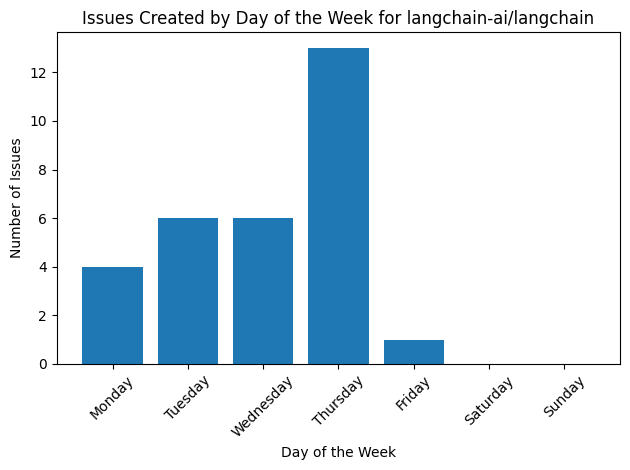

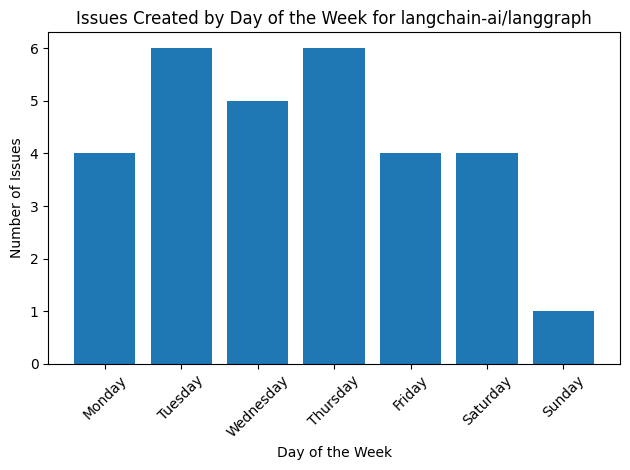

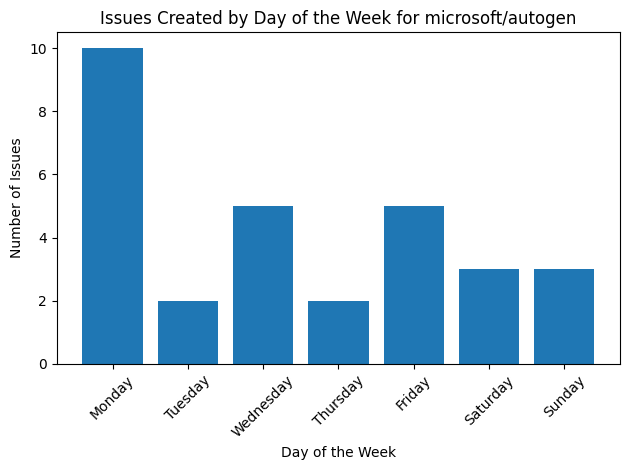

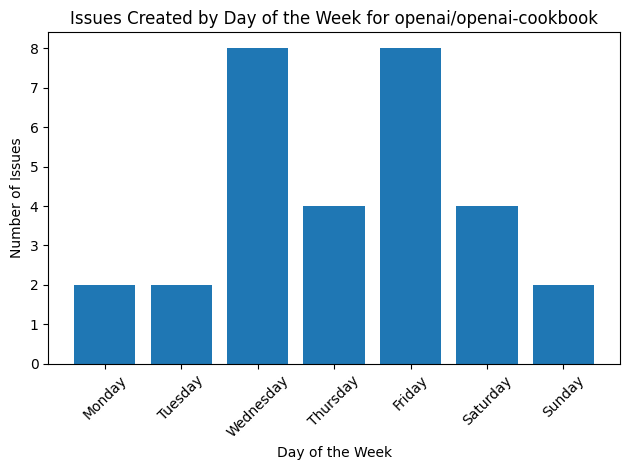

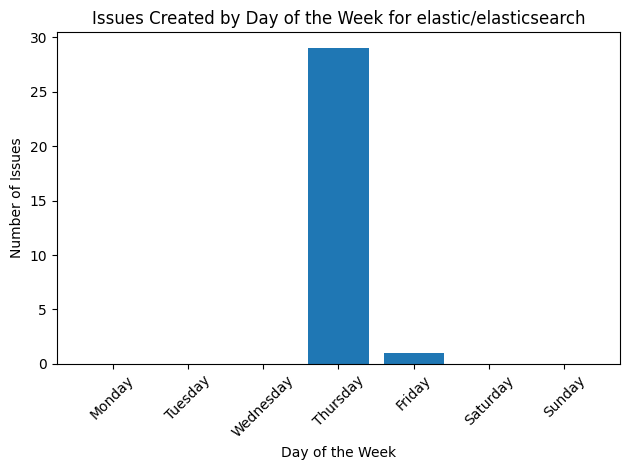

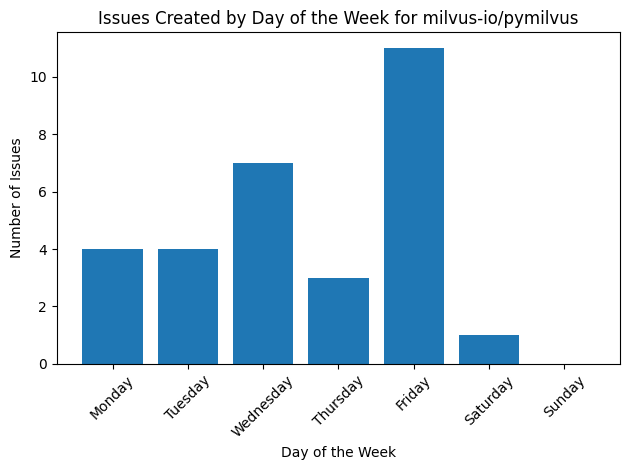

In [20]:
from collections import defaultdict
from datetime import datetime, timedelta
import requests
import matplotlib.pyplot as plt

# GitHub API endpoint for issues
API_URL = "https://api.github.com/repos/{}/issues"

# Function to fetch issues for a repository
def fetch_issues(repo_url):
    repo_name = repo_url.split("/")[-2] + "/" + repo_url.split("/")[-1]
    response = requests.get(API_URL.format(repo_name))
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch issues for", repo_url)
        print("Status code:", response.status_code)
        print("Response:", response.text)
        return []

# Function to filter issues for the past 2 months
def filter_issues_for_past_2_months(issues):
    two_months_ago = datetime.now() - timedelta(days=30*2)
    return [issue for issue in issues if datetime.strptime(issue['created_at'], '%Y-%m-%dT%H:%M:%SZ') > two_months_ago]

# Function to count the number of issues created on each day of the week for every repository
def count_issues_per_day_of_week(issues):
    issues_per_day = defaultdict(int)
    for issue in issues:
        created_at = datetime.strptime(issue['created_at'], '%Y-%m-%dT%H:%M:%SZ')
        day_of_week = created_at.strftime('%A')  # Get the day of the week (e.g., Monday)
        issues_per_day[day_of_week] += 1
    return issues_per_day

# Function to create a bar chart of issues created on each day of the week for every repository
def plot_issues_per_day_of_week(repo_name, issues_per_day):
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    issue_counts = [issues_per_day[day] for day in days_of_week]
    
    plt.bar(days_of_week, issue_counts)
    plt.title('Issues Created by Day of the Week for {}'.format(repo_name))
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Issues')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Repositories to analyze
repositories = [
            "https://github.com/langchain-ai/langchain",
            "https://github.com/langchain-ai/langgraph", 
            "https://github.com/microsoft/autogen",  
            "https://github.com/openai/openai-cookbook",  
            "https://github.com/elastic/elasticsearch",  
            "https://github.com/milvus-io/pymilvus" 
]

# Fetch, filter, and plot issues for each repository
for repo in repositories:
    issues = fetch_issues(repo)
    if issues:
        issues = filter_issues_for_past_2_months(issues)
        issues_per_day = count_issues_per_day_of_week(issues)
        repo_name = repo.split("/")[-2] + "/" + repo.split("/")[-1]
        plot_issues_per_day_of_week(repo_name, issues_per_day)

## Sanity Test:

Execute following commands from the command window/terminal:

**To verify the index got created:**
- curl -XGET "http://localhost:9200/_cat/indices?v"

**To check the structure of index:**
- curl -X GET "localhost:9200/github_issues?pretty"

**To check the stats of the index:**

- curl -X GET "localhost:9200/github_issues/_stats?pretty"

**To dump the documents in the index to stdout:**
- curl -XGET "http://localhost:9200/github_issues/_search?pretty=true"

**To dump the mapping of  the index to stdout:**
- curl -XGET "localhost:9200/github_issues/_mapping?pretty"


## How to delete  the index?
**To delete the index you created:**
- curl -XDELETE "http://localhost:9200/github_issues?pretty"

